In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import sklearn

Extracting data from recipes of different difficulty levels. Recipes are from https://www.greatbritishchefs.com/ and the scope has been limited to savoury European cuisines with both meat and vegetarian options. 
From recipe pages the recipe name, method, and difficulty was extracted. Ingredients list was not extracted as the ingredients are mentioned in the method. 30 recipes will be used with 78% being used for training

In [ ]:

def url_to_recipe(url):
  '''function takes a recipe url and extracts the recipe from the website'''
  recipe = requests.get(url).text
  soup = BeautifulSoup(recipe, 'lxml')
  recipe_name = soup.find(class_="Recipe__Header Header").find("h1").text

  difficulty = soup.find(class_="RecipeAttributes__Difficulty")

  if difficulty.find(class_="header-attribute-text text-capitalize medium"):
    recipe_difficulty= difficulty.find(class_="header-attribute-text text-capitalize medium").text
  else: 
    recipe_difficulty = soup.find(class_="RecipeAttributes__Difficulty").find(class_="header-attribute-text text-capitalize").text
  recipe_method = [p.text for p in soup.find(class_="Recipe__Method Method").find_all(class_="MethodList__StepText")]

  return [recipe_name, recipe_difficulty, recipe_method]



In [ ]:
recipe_urls = [
               "https://www.greatbritishchefs.com/recipes/barbecued-spatchcock-chicken-recipe",
               "https://www.greatbritishchefs.com/recipes/turkey-arancini-recipe",
               "https://www.greatbritishchefs.com/recipes/chicken-wild-garlic-recipe",
               "https://www.greatbritishchefs.com/recipes/kurnik-chicken-pie-recipe",
               "https://www.greatbritishchefs.com/recipes/roast-quail-farcie-recipe",
               "https://www.greatbritishchefs.com/recipes/roast-chicken-breast-recipe",
               "https://www.greatbritishchefs.com/recipes/beef-cheek-beef-fillet-snails-parsnip",
               "https://www.greatbritishchefs.com/recipes/barbecue-t-bone-steak-recipe",
               "https://www.greatbritishchefs.com/recipes/sirloin-of-beef-recipe",
               "https://www.greatbritishchefs.com/recipes/beef-cheek-and-fillet-recipe",
               "https://www.greatbritishchefs.com/recipes/wagyu-beef-burger-recipe-fermented-lettuce",
               "https://www.greatitalianchefs.com/recipes/malloreddus-recipe-sausage-fennel-ragu",
               "https://www.greatbritishchefs.com/recipes/meatloaf-recipe",
               "https://www.greatbritishchefs.com/recipes/roast-ham-recipe",
               "https://www.greatbritishchefs.com/recipes/pork-neck-recipe-wild-mushrooms-wild-garlic",
               "https://www.greatbritishchefs.com/recipes/lamb-rump-courgette-moussaka",
               "https://www.greatbritishchefs.com/recipes/seaweed-crusted-lamb-recipe",
               "https://www.greatbritishchefs.com/recipes/amchur-fenugreek-lamb-rumps-recipe",
               "https://www.greatbritishchefs.com/recipes/pressed-lamb-shoulder-sweetbreads-and-loin-with-lemon-puree",
               "https://www.greatbritishchefs.com/recipes/lamb-celeriac-recipe",
               "https://www.greatbritishchefs.com/recipes/marinated-black-cod-recipe",
               "https://www.greatbritishchefs.com/recipes/stuffed-calamari-recipe",
               "https://www.greatbritishchefs.com/recipes/baccala-stuffed-courgette-flowers-recipe",
               "https://www.greatbritishchefs.com/recipes/cod-loin-with-spaghetti-recipe",
               "https://www.greatbritishchefs.com/recipes/scallop-leeks-dill-recipe",
               "https://www.greatbritishchefs.com/recipes/aubergine-cheese-bake-recipe",
               "https://www.greatbritishchefs.com/recipes/vegetable-puffs-recipe",
               "https://www.greatbritishchefs.com/recipes/leek-and-mushroom-pie-recipe",
               "https://www.greatbritishchefs.com/recipes/pea-mousse-mint-snow-recipe",
               "https://www.greatbritishchefs.com/recipes/yeasted-cauliflower-recipe"
]

In [ ]:
'''adding more recipes after finding 30 recipes did not result in high accuracies'''
more_recipe_urls = [
                    "https://www.greatbritishchefs.com/recipes/steak-salad-with-pumpkin-recipe",
                    "https://www.greatbritishchefs.com/recipes/brisket-mash-cabbage-recipe",
                    "https://www.greatbritishchefs.com/recipes/beef-fillet-ox-cheek-nettle-recipe",
                    "https://www.greatbritishchefs.com/recipes/mrs-bainbridges-cottage-pie-recipe",
                    "https://www.greatbritishchefs.com/recipes/beef-fillet-recipe-hay-beetroot",
                    "https://www.greatbritishchefs.com/recipes/lasagne-pastachina-recipe",
                    "https://www.greatbritishchefs.com/recipes/chicken-skin-butter-recipe",
                    "https://www.greatbritishchefs.com/recipes/chicken-barley-morels-recipe",
                    "https://www.greatbritishchefs.com/recipes/poached-and-roasted-chicken-recipe",
                    "https://www.greatbritishchefs.com/recipes/pea-and-broad-bean-flatbread-with-chicken-thigh-recipe",
                    "https://www.greatbritishchefs.com/recipes/almond-rice-and-flesh-recipe",
                    "https://www.greatbritishchefs.com/recipes/gourmet-chicken-soup-recipe",
                    "https://www.greatbritishchefs.com/recipes/lamb-rump-anchovies-pea-puree",
                    "https://www.greatbritishchefs.com/recipes/roasted-lamb-rump-recipe",
                    "https://www.greatbritishchefs.com/recipes/lamb-celeriac-recipe",
                    "https://www.greatbritishchefs.com/recipes/slow-roast-pork-belly-recipe",
                    "https://www.greatbritishchefs.com/recipes/pork-parcel-recipe",
                    "https://www.greatbritishchefs.com/recipes/roast-suckling-pig-recipe",
                    "https://www.greatbritishchefs.com/recipes/bouillabasse-recipe-sea-bass-cod-mussels",
                    "https://www.greatbritishchefs.com/recipes/linguine-prawns-lemon-parsley-recipe",
                    "https://www.greatbritishchefs.com/recipes/crusted-salmon-recipe",
                    "https://www.greatbritishchefs.com/recipes/cod-white-beans-recipe",
                    "https://www.greatbritishchefs.com/recipes/sous-vide-sea-bass-recipe-herb-gnocchi",
                    "https://www.greatbritishchefs.com/recipes/spiced-cod-recipe",
                    "https://www.greatbritishchefs.com/recipes/quorn-mushroom-burgers-recipe",
                    "https://www.greatbritishchefs.com/recipes/carrot-casserole-recipe",
                    "https://www.greatbritishchefs.com/recipes/chickpea-veggie-burger-recipe",
                    "https://www.greatbritishchefs.com/recipes/fennel-quinoa-salad-recipe",
                    "https://www.greatbritishchefs.com/recipes/smoked-beetroot-tartare-recipe",
                    "https://www.greatbritishchefs.com/recipes/butternut-squash-gorgonzola-recipe"]

In [ ]:
recipes = [url_to_recipe(url) for url in recipe_urls]

In [ ]:
for url in more_recipe_urls:
  recipes.append(url_to_recipe(url))

In [ ]:
def combine_text(list_of_text):
  '''Takes a list of text and combines them into one large group of text.'''
  combined_text = ' '.join(list_of_text)
  return combined_text


In [ ]:
recipe_names = [r[0] for r in recipes]
recipe_difficulties = [r[1] for r in recipes]
recipe_combined = [combine_text(r[2]) for r in recipes]
recipe_methods = [r.replace("\r\n", " ") for r in recipe_combined]
recipe_names = [r.replace("\r\n", " ") for r in recipe_names]

In [ ]:
pd.set_option('max_colwidth', 200)
''' organising data into corpus '''
data = {"Recipe Name": recipe_names, "Method": recipe_methods, "Difficulty": recipe_difficulties}
recipe_df = pd.DataFrame(data=data, columns=["Recipe_Name", "Method", "Difficulty"])

recipe_df.to_csv("recipe_corpus.csv")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer


In [ ]:
'''extracting n-grams'''
tfidf = TfidfVectorizer(sublinear_tf=True, min_df = 10, norm='l2', encoding='latin-1', ngram_range=(1,2), stop_words='english')

'''organising n-gram features into a document frequency matrix'''
features = tfidf.fit_transform(recipe_df.Method).toarray()
labels = recipe_df.Difficulty
features.shape

(30, 609)

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np

In [ ]:
recipe_df['difficulty_id'] = recipe_df['Difficulty'].factorize()[0]
difficulty_id_df = recipe_df[['Difficulty', 'difficulty_id']].drop_duplicates().sort_values('difficulty_id')
difficulty_to_id = dict(difficulty_id_df.values)
id_to_difficulty = dict(difficulty_id_df[['difficulty_id','Difficulty']].values)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, train_size=0.78, random_state=1)


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
models = [RandomForestClassifier(n_estimators=50, max_depth=5, random_state=1),
          LinearSVC(),
          MultinomialNB(),
          LogisticRegression(random_state=1)]

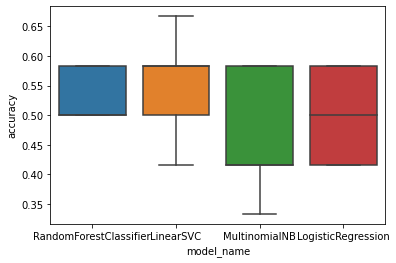

In [ ]:
CV = 5
cv_df = pd.DataFrame(index=range(CV*len(models)))
entries = []

for model in models:
  '''comparing model accuracies'''
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
plt.show()

In [ ]:
models[0].fit(x_train, y_train)
y_pred = models[0].predict(x_test)

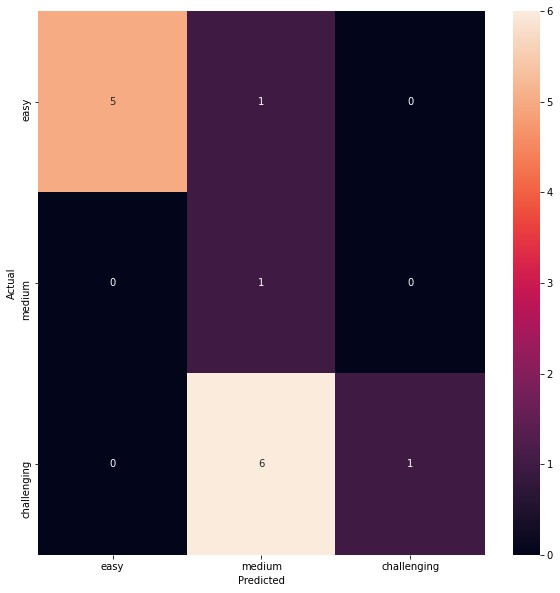

In [ ]:
'''generating a confusion matrix for random forest model'''
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=difficulty_id_df.Difficulty.values, yticklabels=difficulty_id_df.Difficulty.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred, target_names=recipe_df["Difficulty"].unique()))

              precision    recall  f1-score   support

        easy       1.00      0.83      0.91         6
      medium       0.12      1.00      0.22         1
 challenging       1.00      0.14      0.25         7

    accuracy                           0.50        14
   macro avg       0.71      0.66      0.46        14
weighted avg       0.94      0.50      0.53        14

